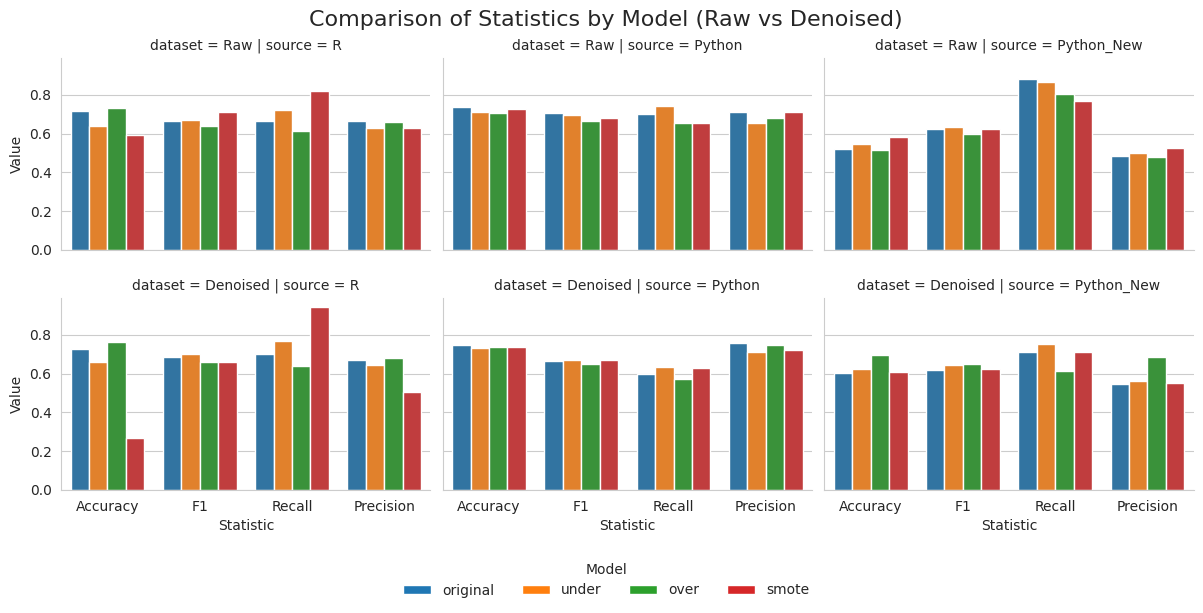

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def load_and_prep(path_raw, path_py, path_py_new, dataset_label):
    df_r      = pd.read_csv(path_raw, sep=",")
    df_py     = pd.read_csv(path_py, sep=",")
    df_py_new = pd.read_csv(path_py_new, sep=",")

    df_r.rename(columns={'Specificity':'Accuracy'}, inplace=True)
    df_py.rename(columns={'Unnamed: 0':'model'}, inplace=True)
    df_py_new.rename(columns={'Unnamed: 0':'model'}, inplace=True)
    df_r = df_r.iloc[:-1, 1:]

    stats = ['Accuracy','F1','Recall','Precision']
    combined = pd.concat([
        df_r[['model']+stats].assign(source='R'),
        df_py[['model']+stats].assign(source='Python'),
        df_py_new[['model']+stats].assign(source='Python_New'),
    ], ignore_index=True)

    melted = combined.melt(
        id_vars=['model','source'],
        value_vars=stats,
        var_name='Statistic',
        value_name='Value'
    )
    melted['dataset'] = dataset_label
    return melted

# load data
m_raw = load_and_prep(
    '../csvfiles/comparsion_raw.csv',
    '../csvfiles_python/comparison_360_raw.csv',
    '../csvfiles_new/comparison_360_raw.csv',
    'Raw'
)
m_denoised = load_and_prep(
    '../csvfiles/comparsion_360.csv',
    '../csvfiles_python/comparison_360.csv',
    '../csvfiles_new/comparison_360.csv',
    'Denoised'
)
m_all = pd.concat([m_raw, m_denoised], ignore_index=True)

# plot
sns.set_style("whitegrid")
g = sns.catplot(
    data=m_all,
    x='Statistic', y='Value',
    hue='model',
    row='dataset',
    col='source',
    kind='bar',
    height=4, aspect=1.2,
    palette='tab10',
    legend=False,
    sharey=True
)

# build a single legend manually
models = list(m_all['model'].unique())
colors = sns.color_palette('tab10', len(models))
patches = [Patch(facecolor=colors[i], label=mdl) for i, mdl in enumerate(models)]

g.fig.legend(
    handles=patches,
    labels=models,
    title='Model',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=len(models),
    frameon=False
)

# adjust size & spacing
g.fig.set_size_inches(12, 6)
plt.subplots_adjust(
    top=0.90,     # room for suptitle
    bottom=0.18,  # room for legend
    hspace=0.25
)

# suptitle
g.fig.suptitle(
    'Comparison of Statistics by Model (Raw vs Denoised)',
    fontsize=16
)

plt.show()
